Packages：

In [407]:
import numpy as np
import pandas as pd
from pandas import value_counts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:
import json
# pip install shapely
# user guide for shapely: https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.shape
from shapely.geometry import shape, GeometryCollection, Point

Dataset：
Kingston open data protal:
Building:
https://opendatakingston.cityofkingston.ca/explore/dataset/buildings/export/?location=16,44.23176,-76.4894&basemap=72525b

Question 1

part 1

In [76]:
bus_stops = pd.read_csv('transit-gtfs-stops.csv')
bus_stops.head()

,ID,Code,Name,Coordinates,Description,Zone ID,URL,Location Type,Parent Station ID,Timezone,Wheelchair Boarding
0,00849,NaN,Clyde Court (south side of Cataraqui Woods),"44.26816,-76.56337",NaN,NaN,NaN,NaN,NaN,NaN,0
1,00852,NaN,Emerald Street (south side of Crossfield),"44.2643,-76.55754",NaN,NaN,NaN,NaN,NaN,NaN,0
2,09074,NaN,Augusta Drive (south side of Crossfield),"44.26435,-76.55164",NaN,NaN,NaN,NaN,NaN,NaN,0
3,S00399,NaN,Kingston Gospel Temple (south side of Princess),"44.25801,-76.54824",NaN,NaN,NaN,NaN,NaN,NaN,0
4,00406,NaN,Friarhill Crescent (north side of Waterloo),"44.25398,-76.55169",NaN,NaN,NaN,NaN,NaN,NaN,0


In [77]:
# neighborhood data
neighborhood = pd.read_csv('neighbourhoods.csv')
neighborhood.head()

,"﻿""NAME""",NEIGHBOURHOOD_ID,GeoJSON,geo_point_2d
0,Reddendale,18,"{""coordinates"": [[[-76.5419192958738, 44.22021...","44.21474181987229,-76.56198662690262"
1,Polson Park,28,"{""coordinates"": [[[-76.52825765562557, 44.2376...","44.23493569151008,-76.53127866195359"
2,Cataraqui River East,37,"{""coordinates"": [[[-76.4390714449385, 44.25926...","44.25216048378564,-76.45480098302502"
3,Marker's Acres,23,"{""coordinates"": [[[-76.45002521734263, 44.2803...","44.271478683058696,-76.47717288687956"
4,CFB Kingston,38,"{""coordinates"": [[[-76.41618353528511, 44.2692...","44.24683088077862,-76.43698877035888"


In [78]:
def func_find_neighborhood(geo_point_2d, neighborhood = neighborhood):
    geo_point_2d = geo_point_2d.split(',')
    geo_point_2d = [float(item) for item in geo_point_2d]
    point = Point(geo_point_2d[1],geo_point_2d[0])
    for row_id in range(0,neighborhood.shape[0]):
        polygon = shape(json.loads(neighborhood['GeoJSON'][row_id]))
        if polygon.contains(point):
            return(neighborhood.iloc[:,0][row_id])
    else:
        return('No_neighborhood')

In [79]:
bus_stops_neigh = list(map(func_find_neighborhood, bus_stops['Coordinates'].tolist()))
print(bus_stops_neigh[0:4])

['Cataraqui North', 'Cataraqui North', 'Cataraqui North', 'Waterloo Village']


In [80]:
# some bus stations are outside kingston area (from kingston open data portal)
bus_stops['neighborhood'] = bus_stops_neigh

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


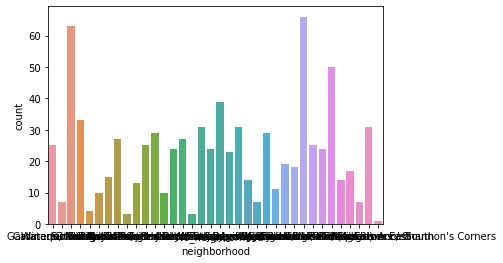

In [81]:
sns.countplot(bus_stops['neighborhood'])

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


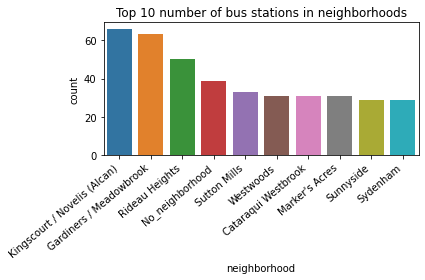

In [82]:
top_10_col = bus_stops['neighborhood'].value_counts()[0:10].index.tolist()
top_10_col
#bus_stops[bus_stops['neighborhood'].isin(top_10_col)]

ax = sns.countplot(bus_stops[bus_stops['neighborhood'].isin(top_10_col)]['neighborhood'], 
                   order=bus_stops['neighborhood'].value_counts()[0:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='Top 10 number of bus stations in neighborhoods')
plt.tight_layout()
plt.show()

In [140]:
no_service_area = []
for name in neighborhood.iloc[:,0].unique().tolist():
    if name not in bus_stops['neighborhood'].unique().tolist():
        no_service_area.append(name)
print(no_service_area)

['Sharpton / Glenvale', 'Ravensview', "Joyceville / Brewer's Mills", 'Kingston Mills', 'St. Lawrence North', 'Glenburnie', 'Woodbine']


The places shown above does not have bus services

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


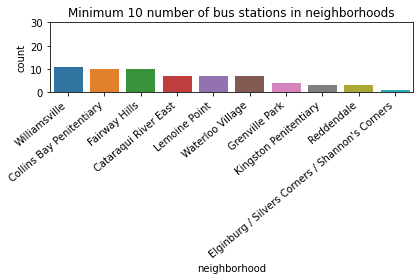

In [145]:
min_10_col = bus_stops['neighborhood'].value_counts()[-10:].index.tolist()
min_10_col
#bus_stops[bus_stops['neighborhood'].isin(top_10_col)]

ax = sns.countplot(bus_stops[bus_stops['neighborhood'].isin(min_10_col)]['neighborhood'], 
                   order=bus_stops['neighborhood'].value_counts()[-10:].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='Minimum 10 number of bus stations in neighborhoods')
ax.set(ylim=(0, 30))
plt.tight_layout()
plt.show()

In [142]:
min_10_col

['Williamsville',
 'Collins Bay Penitentiary',
 'Fairway Hills',
 'Cataraqui River East',
 'Lemoine Point',
 'Waterloo Village',
 'Grenville Park',
 'Kingston Penitentiary',
 'Reddendale',
 "Elginburg / Silvers Corners / Shannon's Corners"]

In [83]:
# neighborhood population 2016(the latest neighborhood population that I found)
neighborhood_info = pd.read_csv('neighbourhood-census-profiles-family-housing-mobility.csv')
neighborhood_info.head()

,Community Name,Area Type,Area ID Number,Total Population 2016,Total Population 2011,Population Change,Population Aged 0-4,Population Aged 5-9,Population Aged 10-14,Population Aged 15-19,...,Non-movers - Mobility status 5 years ago,Movers - Mobility status 5 years ago,Non-Migrant - Mobility status 5 years ago,Migrant - Mobility status 5 years ago,Internal Migrant - Mobility status 5 years ago,Intraprovincial Migrant - Mobility status 5 years ago,Interprovincial Migrant - Mobility status 5 years ago,External Migrant - Mobility status 5 years ago,GeoJSON,geo_point_2d
0,Joyceville / Brewers Mills,Neighbourhood,43,1770,1980,-210,60,90,75,100,...,835,395,235,165,160,150,10,10,"{""coordinates"": [[[-76.24469013039291, 44.4191...","44.38538292067768,-76.28596206890569"
1,Alwington,Neighbourhood,34,1115,1090,25,35,55,55,80,...,545,350,140,215,155,120,30,60,"{""coordinates"": [[[-76.4994731896322, 44.22254...","44.2228671760366,-76.50605465502022"
2,Cataraqui North,Neighbourhood,5,4475,3370,1105,285,260,245,255,...,1980,1960,1140,820,715,595,120,105,"{""coordinates"": [[[-76.53363017973487, 44.2587...","44.26913255386315,-76.55242248231944"
3,Cataraqui River East,Neighbourhood,37,3075,2740,335,115,115,140,130,...,1455,1420,740,680,600,360,240,80,"{""coordinates"": [[[-76.4390714449385, 44.25926...","44.25216048378566,-76.45480098302505"
4,Waterloo Village,Neighbourhood,13,2130,2065,65,110,145,145,125,...,1180,660,410,255,235,195,30,25,"{""coordinates"": [[[-76.55285512283804, 44.2581...","44.25482479014073,-76.55088174548007"


In [402]:
neighborhood_info.shape

(41, 62)

In [148]:
neighborhood_info[neighborhood_info['Community Name'].isin(min_10_col)]

,Community Name,Area Type,Area ID Number,Total Population 2016,Total Population 2011,Population Change,Population Aged 0-4,Population Aged 5-9,Population Aged 10-14,Population Aged 15-19,...,Non-movers - Mobility status 5 years ago,Movers - Mobility status 5 years ago,Non-Migrant - Mobility status 5 years ago,Migrant - Mobility status 5 years ago,Internal Migrant - Mobility status 5 years ago,Intraprovincial Migrant - Mobility status 5 years ago,Interprovincial Migrant - Mobility status 5 years ago,External Migrant - Mobility status 5 years ago,GeoJSON,geo_point_2d
3,Cataraqui River East,Neighbourhood,37,3075,2740,335,115,115,140,130,...,1455,1420,740,680,600,360,240,80,"{""coordinates"": [[[-76.4390714449385, 44.25926...","44.25216048378566,-76.45480098302505"
4,Waterloo Village,Neighbourhood,13,2130,2065,65,110,145,145,125,...,1180,660,410,255,235,195,30,25,"{""coordinates"": [[[-76.55285512283804, 44.2581...","44.25482479014073,-76.55088174548007"
5,Williamsville,Neighbourhood,22,2295,2325,-30,80,60,45,140,...,735,1445,695,750,550,460,95,200,"{""coordinates"": [[[-76.49495747454428, 44.2417...","44.238732258564795,-76.499799574149"
18,Grenville Park,Neighbourhood,26,1670,1715,-45,80,70,70,60,...,905,660,475,180,155,120,30,30,"{""coordinates"": [[[-76.5305985113177, 44.25007...","44.24604013620965,-76.53566597900581"
19,Lemoine Point,Neighbourhood,14,1350,1360,-10,60,65,90,85,...,795,495,330,160,145,125,20,15,"{""coordinates"": [[[-76.59318756066864, 44.2388...","44.22699552164968,-76.60595048418064"
28,Elginburg / Silvers Corners / Shannon's Corners,Neighbourhood,2,2545,2565,-20,75,130,130,150,...,1795,480,270,210,180,145,40,30,"{""coordinates"": [[[-76.44672119759959, 44.3441...","44.30816658121638,-76.49948020457725"
32,Fairway Hills,Neighbourhood,30,2510,2510,0,95,90,135,155,...,1250,1215,700,515,420,365,55,95,"{""coordinates"": [[[-76.53831405222454, 44.2357...","44.22650558186618,-76.53623149205949"
35,Reddendale,Neighbourhood,18,1275,1305,-30,55,75,70,75,...,850,435,285,150,125,100,25,25,"{""coordinates"": [[[-76.5419192958738, 44.22021...","44.214741819872245,-76.56198662690277"


In [ ]:
These area has common things: low population, 

In [84]:
# after sort, 1st line is kingston total population
top_10_population = neighborhood_info.sort_values(by=['Total Population 2016'], ascending=False).iloc[1:11]
#top_10_population


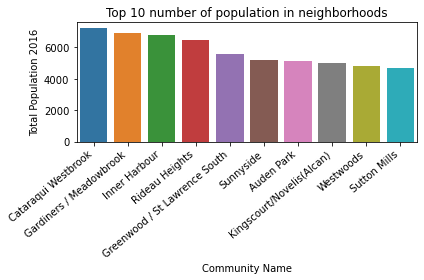

In [85]:
ax = sns.barplot(x = top_10_population['Community Name'], y = top_10_population['Total Population 2016'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='Top 10 number of population in neighborhoods')
plt.tight_layout()
plt.show()

In [86]:
neigh_bus_count = pd.DataFrame(bus_stops['neighborhood'].value_counts())
neigh_bus_count['station_count'] = neigh_bus_count['neighborhood']
neigh_bus_count['Community Name'] = neigh_bus_count.index
neigh_bus_count.shape

(36, 3)

In [87]:
len(sorted(neighborhood.iloc[:,0].unique()))

42

In [88]:
len(sorted(neighborhood_info.iloc[:,0].unique()))

41

In [89]:
# there is difference for neighborhoods between datasets, neighborhood and neighborhood_info

In [90]:
sorted(neighborhood_info.iloc[:,0].unique())

['Alwington',
 'Auden Park',
 'Bayridge East',
 'Bayridge West',
 'CFB Kingston',
 'Calvin Park',
 'Cataraqui North',
 'Cataraqui River East',
 'Cataraqui Westbrook',
 'Elginburg / Silvers Corners / Shannons Corners',
 'Fairway Hills',
 'Gardiners / Meadowbrook',
 'Glenburnie',
 'Greenwood / St Lawrence South',
 'Grenville Park',
 'Henderson',
 'Hillendale',
 'Inner Harbour',
 'Joyceville / Brewers Mills',
 'Kingscourt/Novelis(Alcan)',
 'Kingston',
 'Kingston Mills',
 'Lemoine Point',
 'Markers Acres',
 'Mile Square',
 'Polson Park',
 'Portsmouth',
 'Queens',
 'Ravensview',
 'Reddendale',
 'Rideau Heights',
 'Sharpton / Glenvale',
 'St Lawrence North',
 'Strathcona Park',
 'Sunnyside',
 'Sutton Mills',
 'Sydenham',
 'Waterloo Village',
 'Westwoods',
 'Williamsville',
 'Woodbine']

In [91]:
sorted(neighborhood.iloc[:,0].unique())

['Alwington',
 'Auden Park',
 'Bayridge East',
 'Bayridge West',
 'CFB Kingston',
 'Calvin Park',
 'Cataraqui North',
 'Cataraqui River East',
 'Cataraqui Westbrook',
 'Collins Bay Penitentiary',
 "Elginburg / Silvers Corners / Shannon's Corners",
 'Fairway Hills',
 'Gardiners / Meadowbrook',
 'Glenburnie',
 'Greenwood Park / St. Lawrence South',
 'Grenville Park',
 'Henderson',
 'Hillendale',
 'Inner Harbour',
 "Joyceville / Brewer's Mills",
 'Kingscourt / Novelis (Alcan)',
 'Kingston Mills',
 'Kingston Penitentiary',
 'Lemoine Point',
 "Marker's Acres",
 'Mile Square',
 'Polson Park',
 'Portsmouth',
 "Queen's",
 'Ravensview',
 'Reddendale',
 'Rideau Heights',
 'Sharpton / Glenvale',
 'St. Lawrence North',
 'Strathcona Park',
 'Sunnyside',
 'Sutton Mills',
 'Sydenham',
 'Waterloo Village',
 'Westwoods',
 'Williamsville',
 'Woodbine']

In [92]:
names = sorted(neighborhood.iloc[:,0].unique().tolist()) + sorted(neighborhood_info.iloc[:,0].unique().tolist())
pd.value_counts(np.array(names), ascending = True)[0:20].sort_index()

Collins Bay Penitentiary                           1
Elginburg / Silvers Corners / Shannon's Corners    1
Elginburg / Silvers Corners / Shannons Corners     1
Gardiners / Meadowbrook                            2
Greenwood / St Lawrence South                      1
Greenwood Park / St. Lawrence South                1
Joyceville / Brewer's Mills                        1
Joyceville / Brewers Mills                         1
Kingscourt / Novelis (Alcan)                       1
Kingscourt/Novelis(Alcan)                          1
Kingston                                           1
Kingston Penitentiary                              1
Lemoine Point                                      2
Marker's Acres                                     1
Markers Acres                                      1
Queen's                                            1
Queens                                             1
St Lawrence North                                  1
St. Lawrence North                            

In [93]:
# Difference between names in these 2 datasets, convert data in neighborhood_info to the same name as neigh_bus_count
neighborhood_info['Community Name'] = neighborhood_info['Community Name'].replace(['Queens', 'St Lawrence North', 'Greenwood / St Lawrence South', 'Elginburg / Silvers Corners / Shannons Corners','Joyceville / Brewers Mills','Kingscourt/Novelis(Alcan)','Markers Acres'],["Queen's","St. Lawrence North","Greenwood Park / St. Lawrence South","Elginburg / Silvers Corners / Shannon's Corners","Joyceville / Brewer's Mills", "Kingscourt / Novelis (Alcan)", "Marker's Acres", ])
# No neighborhood data at Collins Bay Penitentiary and Kingston Penitentiary

In [115]:
neighborhood_info_merge = pd.merge(neighborhood_info, neigh_bus_count, on='Community Name', how='left')
neighborhood_info_merge.drop(neighborhood_info_merge[neighborhood_info_merge['Community Name'] == 'Kingston'].index, inplace=True)

In [116]:
neighborhood_info_merge

,Community Name,Area Type,Area ID Number,Total Population 2016,Total Population 2011,Population Change,Population Aged 0-4,Population Aged 5-9,Population Aged 10-14,Population Aged 15-19,...,Non-Migrant - Mobility status 5 years ago,Migrant - Mobility status 5 years ago,Internal Migrant - Mobility status 5 years ago,Intraprovincial Migrant - Mobility status 5 years ago,Interprovincial Migrant - Mobility status 5 years ago,External Migrant - Mobility status 5 years ago,GeoJSON,geo_point_2d,neighborhood,station_count
0,Joyceville / Brewer's Mills,Neighbourhood,43,1770,1980,-210,60,90,75,100,...,235,165,160,150,10,10,"{""coordinates"": [[[-76.24469013039291, 44.4191...","44.38538292067768,-76.28596206890569",NaN,NaN
1,Alwington,Neighbourhood,34,1115,1090,25,35,55,55,80,...,140,215,155,120,30,60,"{""coordinates"": [[[-76.4994731896322, 44.22254...","44.2228671760366,-76.50605465502022",13.0,13.0
2,Cataraqui North,Neighbourhood,5,4475,3370,1105,285,260,245,255,...,1140,820,715,595,120,105,"{""coordinates"": [[[-76.53363017973487, 44.2587...","44.26913255386315,-76.55242248231944",25.0,25.0
3,Cataraqui River East,Neighbourhood,37,3075,2740,335,115,115,140,130,...,740,680,600,360,240,80,"{""coordinates"": [[[-76.4390714449385, 44.25926...","44.25216048378566,-76.45480098302505",7.0,7.0
4,Waterloo Village,Neighbourhood,13,2130,2065,65,110,145,145,125,...,410,255,235,195,30,25,"{""coordinates"": [[[-76.55285512283804, 44.2581...","44.25482479014073,-76.55088174548007",7.0,7.0
5,Williamsville,Neighbourhood,22,2295,2325,-30,80,60,45,140,...,695,750,550,460,95,200,"{""coordinates"": [[[-76.49495747454428, 44.2417...","44.238732258564795,-76.499799574149",11.0,11.0
6,Henderson,Neighbourhood,16,3180,3250,-70,135,150,180,185,...,510,355,320,255,70,30,"{""coordinates"": [[[-76.5809068862234, 44.22928...","44.22320702471155,-76.57772467603452",24.0,24.0
7,Kingston Mills,Neighbourhood,42,600,515,85,25,25,25,25,...,85,90,90,90,0,0,"{""coordinates"": [[[-76.3516130536033, 44.35268...","44.33299015108012,-76.3953386518988",NaN,NaN
8,Marker's Acres,Neighbourhood,23,2860,2810,50,160,140,105,120,...,625,580,525,395,130,55,"{""coordinates"": [[[-76.45002521734263, 44.2803...","44.271478683058696,-76.47717288687963",31.0,31.0
9,Portsmouth,Neighbourhood,31,2410,2525,-115,85,70,55,130,...,580,505,420,330,90,90,"{""coordinates"": [[[-76.51525703850527, 44.2228...","44.22288021643292,-76.52108898526039",27.0,27.0


In [117]:
# filling Nan on bus_count with 0
neighborhood_info_merge['station_count'] = neighborhood_info_merge['station_count'].fillna(0)
# count bus station per population
neighborhood_info_merge['population/station ratio'] = neighborhood_info_merge['Total Population 2016'] / neighborhood_info_merge['station_count']
min_10_ratio = neighborhood_info_merge.sort_values(by=['population/station ratio'], ascending=False).iloc[0:10]
pd.DataFrame({'Community Name':min_10_ratio['Community Name'], 'population/station ratio':min_10_ratio['population/station ratio']})

,Community Name,population/station ratio
0,Joyceville / Brewer's Mills,inf
12,Ravensview,inf
39,Glenburnie,inf
33,Sharpton / Glenvale,inf
30,St. Lawrence North,inf
7,Kingston Mills,inf
22,Woodbine,inf
28,Elginburg / Silvers Corners / Shannon's Corners,2545.000000
3,Cataraqui River East,439.285714
35,Reddendale,425.000000


This means there is no bus services for Kingston Mills, Woodbine, St. Lawrence North, Sharpton / Glenvale, Glenburnie, Ravensview and Joyceville / Brewer's Mills do not have bus services.

In [114]:
min_11_20_ratio = neighborhood_info_merge.sort_values(by=['population/station ratio'], ascending=False).iloc[10:20]
pd.DataFrame({'Community Name':min_11_20_ratio['Community Name'], 'population/station ratio':min_11_20_ratio['population/station ratio']})

,Community Name,population/station ratio
35,Reddendale,425.000000
18,Grenville Park,417.500000
20,Greenwood Park / St. Lawrence South,398.214286
4,Waterloo Village,304.285714
24,Inner Harbour,283.750000
32,Fairway Hills,251.000000
36,Cataraqui Westbrook,233.387097
27,Bayridge East,215.357143
5,Williamsville,208.636364
40,Polson Park,193.333333


Now, suppose less than 300 population/station ratio (300 people use 1 bus station) is a good distribution of all bus stations,  Community Name above are also need to improve the bus station distribution among the neighborhoods.


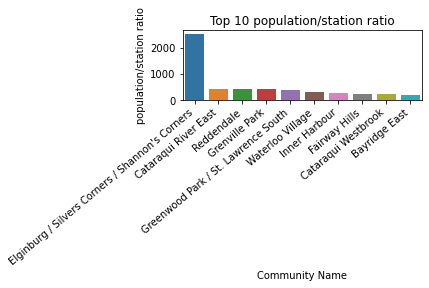

In [150]:
max_ratio = neighborhood_info_merge.sort_values(by=['population/station ratio'], ascending=False).iloc[7:17] # ignore infs
ax = sns.barplot(x = max_ratio['Community Name'], y = max_ratio['population/station ratio'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='Top 10 population/station ratio')
plt.tight_layout()
plt.show()

1.2 combine with building and bus route data

In [180]:
bus_routes = pd.read_csv('transit-gtfs-routes.csv')
bus_routes.head()

,ID,Short Name,Long Name,Route Type,Color,Route URL,Shape,Filename,geo_point_2d
0,2,2,NaN,Bus,F99D31,NaN,"{""coordinates"": [[[-76.47791, 44.27481], [-76....",gtfs,"44.243708003372184,-76.5037290385666"
1,3,3,NaN,Bus,026CB6,NaN,"{""coordinates"": [[[-76.51679, 44.24181], [-76....",gtfs,"44.22991644867326,-76.51537956983793"
2,4,4,NaN,Bus,ED1556,NaN,"{""coordinates"": [[[-76.57215, 44.25508], [-76....",gtfs,"44.24790957384827,-76.53027160487242"
3,10,10,NaN,Bus,636466,NaN,"{""coordinates"": [[[-76.57294, 44.25507], [-76....",gtfs,"44.23477390682719,-76.62670440010467"
4,11,11,NaN,Bus,008752,NaN,"{""coordinates"": [[[-76.57271, 44.25508], [-76....",gtfs,"44.24159762463092,-76.54931753250456"


In [181]:
# the first route has 259 coordiantes to represent its path
len(json.loads(bus_routes['Shape'][0])['coordinates'][0])

259

In [182]:
# there is 23 routes
bus_routes.shape[0]

23

In [183]:
bus_routes.loc[17]

ID                                           999
Short Name                                   NaN
Long Name       999 Maintenance - Out of Service
Route Type                                   Bus
Color                                     000000
Route URL                                    NaN
Shape                                        NaN
Filename                                    gtfs
geo_point_2d                                 NaN
Name: 17, dtype: object

In [184]:
bus_routes.drop([17], inplace = True)

In [185]:
bus_routes.reset_index(drop = True,inplace=True)

In [186]:
bus_routes

,ID,Short Name,Long Name,Route Type,Color,Route URL,Shape,Filename,geo_point_2d
0,2,2,NaN,Bus,F99D31,NaN,"{""coordinates"": [[[-76.47791, 44.27481], [-76....",gtfs,"44.243708003372184,-76.5037290385666"
1,3,3,NaN,Bus,026CB6,NaN,"{""coordinates"": [[[-76.51679, 44.24181], [-76....",gtfs,"44.22991644867326,-76.51537956983793"
2,4,4,NaN,Bus,ED1556,NaN,"{""coordinates"": [[[-76.57215, 44.25508], [-76....",gtfs,"44.24790957384827,-76.53027160487242"
3,10,10,NaN,Bus,636466,NaN,"{""coordinates"": [[[-76.57294, 44.25507], [-76....",gtfs,"44.23477390682719,-76.62670440010467"
4,11,11,NaN,Bus,008752,NaN,"{""coordinates"": [[[-76.57271, 44.25508], [-76....",gtfs,"44.24159762463092,-76.54931753250456"
5,502,502,NaN,Bus,231F20,NaN,"{""coordinates"": [[[-76.48491, 44.23107], [-76....",gtfs,"44.2367690827562,-76.54410903599546"
6,602,602,NaN,Bus,231F20,NaN,"{""coordinates"": [[[-76.49475, 44.22427], [-76....",gtfs,"44.24909967103268,-76.4643819443396"
7,701,701,NaN,Bus,231F20,NaN,"{""coordinates"": [[[-76.50275, 44.26492], [-76....",gtfs,"44.241452583865296,-76.52239257615868"
8,COV,COV,NaN,Bus,000000,NaN,"{""coordinates"": [[[-76.59739, 44.25847], [-76....",gtfs,"44.259465418783144,-76.5874577198015"
9,802,802,NaN,Bus,000000,NaN,"{""coordinates"": [[[-76.49143, 44.23207], [-76....",gtfs,"44.246633661445195,-76.48534582784451"


In [320]:
json.loads(bus_routes['Shape'][11])['coordinates'][0]

[[-76.47791, 44.27481],
 [-76.4781499, 44.2748899],
 [-76.47916, 44.27438],
 [-76.4796, 44.27413],
 [-76.4802, 44.2735399],
 [-76.48096, 44.2727899],
 [-76.48172, 44.2722],
 [-76.48254, 44.27156],
 [-76.48319, 44.27115],
 [-76.48381, 44.27157],
 [-76.48405, 44.2715399],
 [-76.48445, 44.27135],
 [-76.4854399, 44.27081],
 [-76.48624, 44.2704],
 [-76.48719, 44.2698699],
 [-76.48766, 44.2696399],
 [-76.4877699, 44.2694799],
 [-76.48764, 44.26844]]

In [321]:
# expand the coordinates for each bus route
ID_list = []; location_list = []
for num in range(0,bus_routes.shape[0]):
    length = 0
    for i in range(len(json.loads(bus_routes['Shape'][num])['coordinates'])):
        location_list = location_list+json.loads(bus_routes['Shape'][num])['coordinates'][i]
        length += len(json.loads(bus_routes['Shape'][num])['coordinates'][i])
    ID_list = ID_list+[bus_routes['ID'][num]]*length
bus_id_location = pd.DataFrame({'ID': ID_list, 'location': location_list})
bus_id_location.head()

,ID,location
0,2,"[-76.47791, 44.27481]"
1,2,"[-76.4781499, 44.2748899]"
2,2,"[-76.47916, 44.27438]"
3,2,"[-76.4796, 44.27413]"
4,2,"[-76.4802, 44.2735399]"


In [326]:
for i in range(1,len(bus_id_location['location'])):
    if bus_id_location['location'][i][0] > bus_id_location['location'][i][1]:
        bus_loc = bus_id_location['location'][i]
        bus_loc.reverse()
        bus_id_location.at[i,'location']=bus_loc

In [322]:
id_location.shape

(2671, 2)

In [202]:
# pip install geopy, calculate 2 coordinates distance on the earth.
from geopy.distance import geodesic

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)
print(geodesic(coords_1, coords_2).km)

279.35290160430094


In [152]:
building = pd.read_csv('buildings.csv')
building.head()

,BUILDING_ID,"﻿""TYPE""",BUILDING_CLASS,POI_CLASS,NAME,GeoJSON,geo_point_2d
0,38916,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.31054062396615, 44.3842...","44.384280312725075,-76.31052724283094"
1,38984,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.25326045174532, 44.3869...","44.38696682739298,-76.25334306083846"
2,18969,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.48877900435801, 44.2613...","44.261293228098154,-76.4888314072834"
3,20125,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.50212557093043, 44.2615...","44.2615554361957,-76.5021487108588"
4,46519,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.5802808969356, 44.23176...","44.23179622214771,-76.58030354039495"


building['BUILDING_CLASS'].unique()

In [204]:
building['POI_CLASS'].unique()

array([nan, 'CFB', 'Education Facility', 'Childcare Facility',
       'Shopping Centre', 'Local Government', 'Marina', 'Historic Site',
       'Penitentiary', 'Airport', 'Museum', 'Park', "Queen's University",
       'Change Room', 'Significant Industrial', 'Provincial Government',
       'Place of Worship', 'Municipal Government Facility',
       'Picnic Facility', 'Hotel / Motel', 'Fire Training Facility',
       'Heritage Site', 'Federal Government', 'Off-Leash Dog Park',
       'Community Service', 'Parking Lot', 'Batting Cage',
       'Retirement Residence', 'Golf Course', 'Hospital',
       'Ambulance Station', 'Washroom', 'Splash Pad', 'Cemetery',
       'Train Station', 'Info Centre', 'Bus Transfer Station', 'Library',
       'Arena', 'Gallery', 'Health Centre', 'Long Term Care',
       'Fire Station', 'Recreation Facility', 'Police Station',
       'Entertainment Facility', 'Ferry Terminal', 'Theatre',
       'Government Centre', 'Coast Guard', 'Bus Station',
       'Community

For building class, High Density Mixed Use, High Density Residential are apartments.
For POI_CLASS = nan and BUILDING_CLASS = general, they are normal houses.

In [224]:
apartment = building[(building['BUILDING_CLASS'] == 'High Density Mixed Use') | (building['BUILDING_CLASS'] == 'High Density Residential')]
apartment.reset_index(inplace = True)
apartment.head()

,index,BUILDING_ID,"﻿""TYPE""",BUILDING_CLASS,POI_CLASS,NAME,GeoJSON,geo_point_2d
0,795,42920,Demolished,High Density Residential,NaN,NaN,"{""coordinates"": [[[-76.51492323490722, 44.2317...","44.231762169714855,-76.51491356761481"
1,849,10480,Demolished,High Density Residential,NaN,NaN,"{""coordinates"": [[[-76.46020915926285, 44.2508...","44.251115814169786,-76.45947714367487"
2,919,53204,Demolished,High Density Residential,Shopping Centre,NaN,"{""coordinates"": [[[-76.50388135845014, 44.2381...","44.23825252763094,-76.50392809751477"
3,1694,82475,Building Roofline,High Density Residential,NaN,220 Colborne St Apartments,"{""coordinates"": [[[-76.49571319056652, 44.2354...","44.235572152954006,-76.49572563973528"
4,1704,9549,Building Roofline,High Density Residential,NaN,"Waverly Apartments, 1254 Princess St","{""coordinates"": [[[-76.52479112308284, 44.2461...","44.24648737049868,-76.52473865384752"


In [225]:
house = building[(building['BUILDING_CLASS'] == 'General') & (building.POI_CLASS.isnull())]
house.reset_index(inplace = True)
house.head()

,index,BUILDING_ID,"﻿""TYPE""",BUILDING_CLASS,POI_CLASS,NAME,GeoJSON,geo_point_2d
0,0,38916,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.31054062396615, 44.3842...","44.384280312725075,-76.31052724283094"
1,1,38984,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.25326045174532, 44.3869...","44.38696682739298,-76.25334306083846"
2,2,18969,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.48877900435801, 44.2613...","44.261293228098154,-76.4888314072834"
3,3,20125,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.50212557093043, 44.2615...","44.2615554361957,-76.5021487108588"
4,4,46519,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.5802808969356, 44.23176...","44.23179622214771,-76.58030354039495"


In [226]:
print('number of houses:', house.shape[0] )
print('number of apartments:', apartment.shape[0] )

number of houses: 58879
number of apartments: 444


# old idea for calculate distance between each house & apartment and bus route's stops, too complex, comment these 2 cells.

# finding close bus routes for apartments
# this one runs slow, because it calculates all distances between each bus stops and apartments

apartment_bus = []
for i in range(len(apartment['geo_point_2d'])):
    bus = []; apart_loc = apartment['geo_point_2d'][i].split(',')
    apart_loc.reverse()
    apart_loc = [float(item) for item in apart_loc]
    
    for j in range(len(bus_id_location['location'])):
        bus_loc = bus_id_location['location'][j]
        if geodesic(apart_loc, bus_loc).km < 3:
            bus += [bus_id_location['ID'][j]]
    apartment_bus = apartment_bus + [list(set(bus))] # remain unique values
apartment['bus'] = apartment_bus
apartment_bus.count([])

# finding close bus routes for houses
# this one runs slow, because it calculates all distances between each bus stops and houses

house_bus = []
for i in range(len(house['geo_point_2d'])):
    bus = []; house_loc = house['geo_point_2d'][i].split(',')
    house_loc.reverse()
    house_loc = [float(item) for item in house_loc]
    
    for j in range(len(bus_id_location['location'])):
        bus_loc = bus_id_location['location'][j]
        if geodesic(house_loc, bus_loc).km < 3:
            bus += [bus_id_location['ID'][j]]
    house_bus = house_bus + [list(set(bus))] # remain unique values
house['bus'] = house_bus
house_bus.count([])

### above idea: calculate distance between each house & apartment and bus route's stops
### above idea's complexity: (58879 + 444) * 2671, which is very large

### another idea: 
### 1. label each coordinate of bus stop, to find which bus route stops at this station 799 * 2671
### 2. label each bus stop with different neighborhoods, label each house/apartment with different neighborhoods 
### 799 * 41 + (58879 + 444)  * 41
### 3. for each house/apartment, first find all bus stations in the same neighborhood, then calculate the distance between home and each station in the same neighborhood. approximately 30 * (58879 + 444) * 2

In [328]:
# step 1

station_bus = []
for i in range(len(bus_stops['Coordinates'])):
    bus_in_stop = []
    bus_stop_loc = bus_stops['Coordinates'][i].split(',')
    #bus_stop_loc.reverse()
    bus_stop_loc = [float(item) for item in bus_stop_loc]
    
    for j in range(len(bus_id_location['location'])):
        bus_loc = bus_id_location['location'][j]
        bus_loc.reverse()
        #print(bus_stop_loc, bus_loc)
        #print(geodesic(bus_stop_loc, bus_loc).km)
        if geodesic(bus_stop_loc, bus_loc).km < 0.1: # within 10 meter
            bus_in_stop += [bus_id_location['ID'][j]]
    station_bus = station_bus + [list(set(bus_in_stop))] # remain unique values
bus_stops['buses'] = station_bus
station_bus

[[],
 ['14'],
 [],
 ['7', '14', '501'],
 [],
 ['14'],
 [],
 ['14'],
 ['4', 'COV', '502', '10', '6', '15'],
 ['702'],
 ['3'],
 [],
 ['3'],
 ['XTRA'],
 ['2', '6', '3', '1'],
 ['XTRA', '501'],
 ['2', '3', '1'],
 ['XTRA'],
 ['502', '3'],
 [],
 ['3'],
 [],
 ['3'],
 [],
 ['12', '3'],
 [],
 ['3'],
 [],
 ['3'],
 [],
 ['502', '3'],
 ['XTRA'],
 ['2', '3', '1'],
 ['XTRA'],
 ['3'],
 [],
 ['3'],
 ['702'],
 ['6', '502'],
 ['501'],
 ['6'],
 [],
 ['6'],
 [],
 ['6'],
 [],
 ['6', '502'],
 ['15'],
 ['15', '10'],
 ['15'],
 ['10'],
 [],
 ['10'],
 [],
 ['10'],
 [],
 ['10'],
 [],
 ['10'],
 [],
 ['10'],
 [],
 ['10'],
 [],
 ['15', '10'],
 ['15'],
 ['15'],
 ['15'],
 ['502', '15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['7', '15'],
 ['4', 'COV', '502', '10', '6', '15'],
 ['14', '15'],
 ['15'],
 ['14', '15'],
 ['15', '6', '502', '10'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 ['15'],
 

In [335]:
bus_stops.to_csv('bus_stop_step1.csv')

In [333]:
x = []
for i in station_bus:
    x += i
pd.Series(x).value_counts()

15      194
2        79
16       67
1        66
502      64
501      61
702      52
701      52
6        49
10       49
7        46
3        45
XTRA     41
12       39
11       35
802      35
4        34
801      33
14       25
601      25
602      24
COV      10
dtype: int64

In [331]:
# step 2

# previously bus_stops_neigh is the bus stop's neighborhoods

# find house/apartment's neighborhoods
house_neigh = list(map(func_find_neighborhood, house['geo_point_2d'].tolist()))
apart_neigh = list(map(func_find_neighborhood, apartment['geo_point_2d'].tolist()))
bus_stops['neighborhoods'] = bus_stops_neigh
apartment['neighborhoods'] = apart_neigh
house['neighborhoods'] = house_neigh

house_neigh[0:4]

C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


["Joyceville / Brewer's Mills",
 "Joyceville / Brewer's Mills",
 'Rideau Heights',
 'Kingscourt / Novelis (Alcan)']

In [348]:
# step 3

apartment_bus_3km = []
apartment_bus_1km = []
for i in range(len(apartment['geo_point_2d'])):
    bus_3km = []; bus_1km = []
    apart_loc = apartment['geo_point_2d'][i].split(',')
    #apart_loc.reverse()
    apart_loc = [float(item) for item in apart_loc]

    bus_same_neigh = bus_stops[bus_stops['neighborhoods'] == apart_neigh[i]].reset_index()
    #print(bus_same_neigh)
    for j in range(len(bus_same_neigh['Coordinates'])):
        bus_loc = bus_same_neigh['Coordinates'][j]
        #print(geodesic(apart_loc, bus_loc).km)
        if geodesic(apart_loc, bus_loc).km < 3:
            bus_3km += [bus_same_neigh['buses'][j]]
            if geodesic(apart_loc, bus_loc).km < 1:
                bus_1km += [bus_same_neigh['buses'][j]]
    apartment_bus_3km = apartment_bus_3km + [list(set(bus_3km))] # remain unique values
    apartment_bus_1km = apartment_bus_1km + [list(set(bus_1km))] # remain unique values    
    
apartment['bus_3km'] = apartment_bus_3km
apartment['bus_1km'] = apartment_bus_1km
apartment_bus_3km.count([])

C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1

In [349]:
apartment_bus_1km.count([])

1

In [352]:
apartment.to_csv('apartment_step3.csv')

In [350]:
house_bus_3km = []
house_bus_1km = []
for i in range(len(house['geo_point_2d'])):
    bus_3km = []; bus_1km = []
    house_loc = house['geo_point_2d'][i].split(',')
    #apart_loc.reverse()
    house_loc = [float(item) for item in house_loc]

    bus_same_neigh = bus_stops[bus_stops['neighborhoods'] == house_neigh[i]].reset_index()
    #print(bus_same_neigh)
    for j in range(len(bus_same_neigh['Coordinates'])):
        bus_loc = bus_same_neigh['Coordinates'][j]
        #print(geodesic(apart_loc, bus_loc).km)
        if geodesic(house_loc, bus_loc).km < 3:
            bus_3km += [bus_same_neigh['buses'][j]]
            if geodesic(house_loc, bus_loc).km < 1:
                bus_1km += [bus_same_neigh['buses'][j]]
    house_bus_3km = house_bus_3km + [list(set(bus_3km))] # remain unique values
    house_bus_1km = house_bus_1km + [list(set(bus_1km))] # remain unique values    
    
house['bus_3km'] = house_bus_3km
house['bus_1km'] = house_bus_1km
house_bus_3km.count([])

C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


13053

In [387]:
house_bus_3km_true = []
for i in range(len(house_bus_3km)):
    house_bus_3km_true += [True if house_bus_3km[i] != [] else False]
    
house_bus_1km_true = []
for i in range(len(house_bus_1km)):
    house_bus_1km_true += [True if house_bus_1km[i] != [] else False]

In [388]:
house['bus_3km_true'] = house_bus_3km_true
house['bus_1km_true'] = house_bus_1km_true

C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [354]:
house_bus_1km.count([])

14852

In [353]:
house.to_csv('house_step_3.csv')

In [394]:
house_not_assessable_walk_bike = house[house['bus_1km_true'] == False]
house_not_assessable_walk_bike.head()

,index,BUILDING_ID,"﻿""TYPE""",BUILDING_CLASS,POI_CLASS,NAME,GeoJSON,geo_point_2d,neighborhoods,bus_3km,bus_1km,bus_3km_true,bus_1km_true
0,0,38916,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.31054062396615, 44.3842...","44.384280312725075,-76.31052724283094",Joyceville / Brewer's Mills,[],[],False,False
1,1,38984,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.25326045174532, 44.3869...","44.38696682739298,-76.25334306083846",Joyceville / Brewer's Mills,[],[],False,False
7,7,81864,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.26475323357988, 44.3502...","44.35018135987754,-76.26474673008279",Joyceville / Brewer's Mills,[],[],False,False
9,9,81898,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.28203188753567, 44.3678...","44.36788957534735,-76.2817722276803",Joyceville / Brewer's Mills,[],[],False,False
10,10,40462,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.57064207488725, 44.3474...","44.347455198184505,-76.57062533507462",Sharpton / Glenvale,[],[],False,False


C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


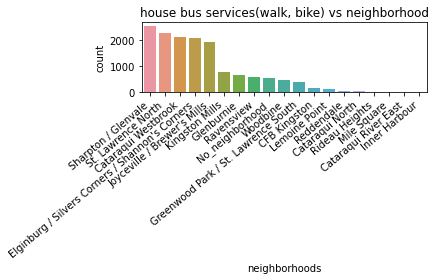

In [400]:
ax = sns.countplot(house_not_assessable_walk_bike['neighborhoods'], order=house_not_assessable_walk_bike['neighborhoods'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='house bus services(walk, bike) vs neighborhood')
plt.tight_layout()
plt.show()

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


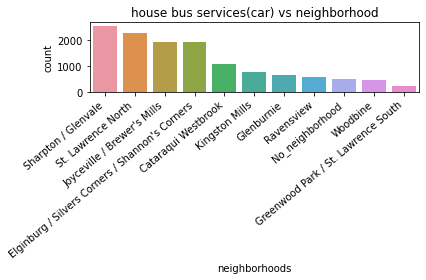

In [401]:
house_not_assessable_car = house[house['bus_3km_true'] == False]
ax = sns.countplot(house_not_assessable_car['neighborhoods'], order=house_not_assessable_car['neighborhoods'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='house bus services(car) vs neighborhood')
plt.tight_layout()
plt.show()

In [415]:
lat = house_not_assessable_car['geo_point_2d'].apply(lambda x: x.split(',')).apply(lambda x: float(x[0]))
lon = house_not_assessable_car['geo_point_2d'].apply(lambda x: x.split(',')).apply(lambda x: float(x[1]))
house_not_assessable_car['lat'] = lat
house_not_assessable_car['lon'] = lon

C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [417]:
house_not_assessable_car.head()

,index,BUILDING_ID,"﻿""TYPE""",BUILDING_CLASS,POI_CLASS,NAME,GeoJSON,geo_point_2d,neighborhoods,bus_3km,bus_1km,bus_3km_true,bus_1km_true,lat,lon
0,0,38916,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.31054062396615, 44.3842...","44.384280312725075,-76.31052724283094",Joyceville / Brewer's Mills,[],[],False,False,44.384280,-76.310527
1,1,38984,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.25326045174532, 44.3869...","44.38696682739298,-76.25334306083846",Joyceville / Brewer's Mills,[],[],False,False,44.386967,-76.253343
7,7,81864,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.26475323357988, 44.3502...","44.35018135987754,-76.26474673008279",Joyceville / Brewer's Mills,[],[],False,False,44.350181,-76.264747
9,9,81898,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.28203188753567, 44.3678...","44.36788957534735,-76.2817722276803",Joyceville / Brewer's Mills,[],[],False,False,44.367890,-76.281772
10,10,40462,Building Roofline,General,NaN,NaN,"{""coordinates"": [[[-76.57064207488725, 44.3474...","44.347455198184505,-76.57062533507462",Sharpton / Glenvale,[],[],False,False,44.347455,-76.570625


In [420]:
# pip install plotly
import plotly.express as px
fig = px.scatter_mapbox(house_not_assessable_car, lat="lat", lon="lon", hover_name="neighborhoods", hover_data=["BUILDING_ID"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()



End of the code for question 1